<a href="https://colab.research.google.com/github/Trailblazer254/Official/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # import pandas for data manipulation
import numpy as np #import numpy for data operation
import plotly .express as px #import plotly for interactive visualization
import plotly .graph_objects#import plotly graph  for advanced visualization
import bokeh.plotting  as bp #import bokeh for web based interactive visualization
import altair as alt #import altair for declarative data visulization
import seaborn as sns #import seaborn for statistical data visualization
import matplotlib.pyplot as plt# import matplotlib for standard plorting
from scipy import stats #importing scipy for statistical annalysis
from statsmodels.tsa.arima.model import ARIMA #importing ARINA MODEL FOR TIME SERIES FORECASTING
import geopandas as gp#importing geopandas for handling spatial data
import folium # import folium for interactive map visualization

In [ ]:
[9]#1. introduction to EDA
#loading asample for dataset

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv") #loading the tips dataset

In [ ]:
#1.3.1 understanding the datastructure
print(df.head())#displaying first five rows for the data set
print(df.info())# displaying the datastructure and data types


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [ ]:
#1.3.2 handling the missing data
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
#1.3.3calculating summary statistics
print(df.describe())#generating a summary statistics such as mean ,std,min,max etc

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


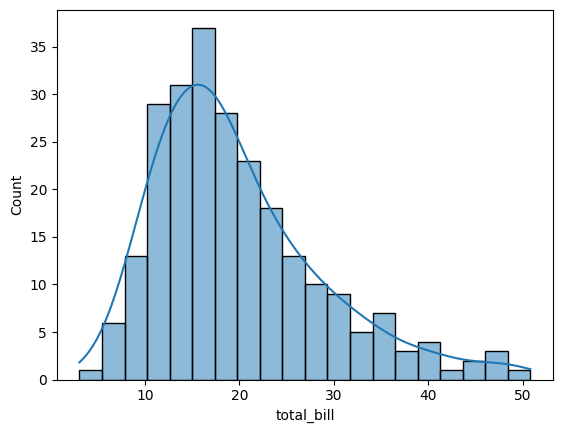

In [ ]:
#1.3.4 data visualization basics
sns.histplot(df['total_bill'] ,bins=20 ,kde=True)
plt.show() #displaying the plot

In [ ]:
#advanced data visualization
#creating interractive ccharts
fig = px.scatter(df, x='size', y='tip', color='sex',title='size vs Tip')
fig.show()#displaying the scatter

In [ ]:
fig=px.bar(df, x='day', y='total_bill', color='sex', title='Total Bill By Day')#creating interractive chart
fig.show()#display the bar chart



In [ ]:
fig = px.line(df.groupby('day')['total_bill'].mean().reset_index(), x= 'day', y = 'total_bill', title='Avg Bill Per Day')#creating an interractive
fig.show()

In [ ]:
#statistical method for EDA
#3.1 KEY STATISTICS
print("Mean:", df['total_bill'].mean()) #calculating and printing the mean of the total bill
print("Variance:", df['total_bill'].var()) #calculating and printing the variance of the total bill
print("Correlation Matrix:\n", df.select_dtypes(include=[np.number]).corr()) #filtering only numeric columns



Mean: 19.78594262295082
Variance: 79.25293861397826
Correlation Matrix:
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


In [ ]:
#hypothesis 3.2
t_start, p_value = stats.ttest_ind(df[df['sex'] == 'Male']['total_bill'],df[df['sex']=='Female']['total_bill'])#performing a t_test to compare
print(f"t-test p- value : {p_value}")#printing the p_value from the t_test


t-test p- value : 0.0236116668468594


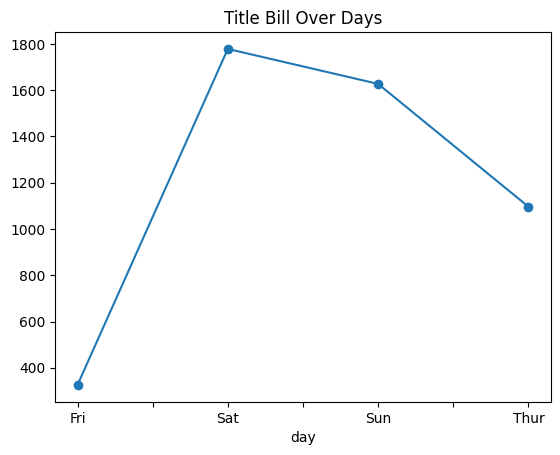

In [ ]:
#time series and spartial data annalysis
#4.1 Time series annalysis
ts_data = df.groupby('day')['total_bill'].sum() #aggregating the total bills per day
ts_data.plot(title = 'Title Bill Over Days', marker='o') #plotting total bill amount over different days
plt.show() # display the time series plot